# Aquisição e Visualização dos Dados de Temperatura dos Sistemas Térmicos 

O objetivo deste guião é fazer a aquisição dos dados experimentais dos sistemas térmicos `S1` e `S2` do **SERT** (Sistema Electrónico de Regulação Térmica). 
O SERT consiste essencialmente numa placa de desenvolvimento Arduino UNO (ou compatível) e uma *shield* com os processos térmicos. O sistema completo funcional inclui, além dos elementos atrás referidos, um cabo USB, um PC/portátil com porta USB compatível, e uma fonte de alimentação 12 V 3 A. Um exemplo de ligação de todos estes dispositivos é mostrado na figura seguinte. Para mais detalhes sobre o SERT, consultar o documento “Sistema eletrónico de regulação térmica para Arduino” disponibilizado na página do Moodle da UC.

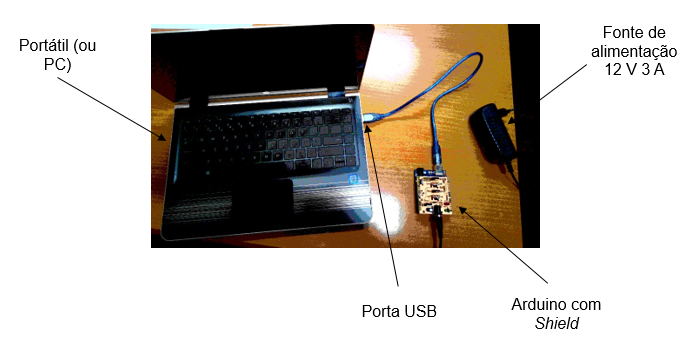


## Carregar bibliotecas

In [ ]:
from pyfirmata import Arduino, util
import time

import numpy as np

## Configurações
Verifique se é necessário alterar a porta COM para coincidir com a localização da placa do Arduino. 

In [ ]:
# Porta COM #### AJUSTAR porta ####
board = Arduino('COM3')

iterator = util.Iterator(board)
iterator.start()

# Entradas analógicas
T_S1 = board.get_pin('a:0:i') # A0
T_S2 = board.get_pin('a:1:i') # A1

# Saídas PWM
S1 = board.get_pin('d:10:p')  # Pino 10
S2 = board.get_pin('d:9:p')   # Pino 9

time.sleep(1)

## Funções 

In [ ]:
# Função de conversão ADC - Temperatura
def TEMP(val):
    return (val*5000.0-500.0)/10.0

# Funções temperaturas
def T1():
    return TEMP(T_S1.read())

def T2():
    return TEMP(T_S2.read())

## Aquisição dos dados
Tal como referido, este modelo pode ser executado para adquirir os dados de temperatura dos sistemas `S1` e `S2`. Especificamente, a resistência de potência ($R1$ ou $R2$) está inicialmente à temperatura ambiente quando o modelo é iniciado. No instante $t = 0$ s, é aplicado ao transístor (`T1` ou `T2`) o valor de PWM correspondente (através da entrada em degrau) e a resistência ($R1$ ou $R2$) começa a aquecer. 
Certifique-se que o tempo de aquisição dos dados é suficiente para que a temperatura estabilize em torno de um valor final (isto é, atinja o estado em regime permanente). Neste caso, um tempo de $600$ segundos deverá ser suficiente, mas depende de cada um dos sitemas e deve ser ajustado, se necessário.

In [ ]:
# Resposta ao degrau  #### AJUSTAR para S1 ou S2 ####
Ts = 1        # período de amostragem

tf = 600.0    # tempo final 

n = int(np.round(tf/Ts+1))  # número de amostras
temp1 = np.zeros(n)         # vetor para temperatura
t = np.linspace(0,n-1,n)*Ts # vetor de tempo

# Entrada de controlo 
u = 50 # 50% PWM
u1 = np.ones(n)*u
print(' t,    u,    T1)')

# Ativar a saída do Arduino conforme a entrada de controlo
S2.write(u/100)

# Ler temperatura do sistema e guardar no vetor  
for i in range(n):
    # ler temperatura
    temp1[i] = T2()
    if i%10 == 0:
        #print(str(t[i])+'   '+str(u1[i])+'   '+str(temp1[i]))
        print(f'{t[i]:3.1f},{u1[i]:3.1f},{temp1[i]:3.1f}')
    time.sleep(Ts)
    
# Desligar sistema
S2.write(0.0)
board.exit() # terminar comunicação com placa

## Visualizar dados

In [ ]:
# Carregar biblioteca para visualização
import matplotlib.pyplot as plt

# Gráficos #### AJUSTAR para S1 ou S2 ####
plt.figure()

# Saída
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t,temp1,'k-',label='T1')
plt.ylabel('Temperatura ($^oC$)')
plt.legend(loc='best')

# Entrada
ax = plt.subplot(2,1,2)
ax.grid()
plt.plot(t,u1,'b-',label='u')
plt.ylabel('Controlo (%)')
plt.xlabel('Tempo (s)')
plt.legend()

# Guardar gráficos num ficheiro .png
plt.savefig('degrau_S1.png')
plt.show()

## Guardar dados em ficheiro

In [ ]:
# Guardar os dados num ficheiro de texto #### AJUSTAR para S1 ou S2 ####
dados = np.vstack((t,u1,temp1)).T
np.savetxt('dados_S2.txt',dados,delimiter=',',\
           header='t(tempo),u(PWM),T2(Temperatura)',comments='')